# Assignment 2
## Naive Bayes Classifier

## Student Details (1 Point)

First Student Name and ID: Rushi Vardhan Reddy Maddi 1002069581

Second Student Name and ID: Rohith Reddy Basireddy 1002069511

Third Student Name and ID: Arun Sreekanth Bayanagari 1002024369



Notes: When submitting, fill your name and ID in this cell.  [1 point]

Make sure to write about any 4-5 line to explain any kind of visualization

Do not to forget to cite any external sources used by you.

# Remeber to cite any external sources here

# Naive Bayes-

## Programming Assignment Details-

## Preprocessing-
You have textual data that you cannot feed into the model. Therefore, you need to extract features from the text (email) and transform the data. There are techniques to do so, such as Bag of Words, n-grams, Tf-Idf, Word2Vec, CountVectorizer, and many others.

## The Model-
Test train split, using 80% for training, rest for testing. Next you will need to train NB model(Gausian) for classification.

Create the model using training data, predict on the test data, and get the accuracy, plot the confusion matrix.

## Metrics to report- 
You will need to report-
1. Accuracy Score(metrics.accuracy_score)
2. Confusion Matrix(metrics.confusion_matrix) plotted graphically(It needs to be in the final jupyter file which you submit)

## Answer the following questions-
Do not include too much information, it has to be consise. Just your student ids, and the necessary info.
1. Briefly explain your approach, any preprocessing, explain the output, any visualisation for explanation, in same jupyter file. (3-4 paragraphs max)

## Grading-
1. (30 pts) Loading and preprocessing of the data.
2. (30 pts) Creation of correct model(NB), with decent metrics, plotting confusion matrix.
3. (30 pts) Explaining the approach, also explain the(if any) preprocessor which you used.
4. (7 pts) Neatly presented code, with comments, correctly named files, complete report section, and followed the UTA code of conduct.

## Programming Assignment Submission Instructions (2 Points)
Each file should be submitted separately, do not compress them, only one student submits.

Format of file naming:

NB-
'yourLastName_Last4digitsofyourID_NB.ipynb' (Report in markdown cells and code in code cells of Notebook preferred)

## What to submit-
1. Jupyter files(.ipynb)

## Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import pandas as pd

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Any other relevant import for feature extraction

## Import Dataset 

In [3]:
#Check the null values in the dataset
df.isnull().sum()


email    1
label    0
dtype: int64

## Preprocessing the dataset

In [4]:
import re

def preprocess(text):
    if isinstance(text, str):

        # Convert to lowercase
        text = text.lower()

        # Remove email headers
        headers = ["from:", "to:", "subject:", "cc:", "bcc:"]
        for header in headers:
            index = text.find(header)
            if index != -1:
                text = text[index+len(header):]

        # Remove punctuation and numbers
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\d+', '', text)
        
        # Convert to lowercase
        text = text.lower()

        # Remove email headers
        text = re.sub(r'^.*?(?=from:)', '', text, flags=re.M|re.S)

        # Remove email addresses
        text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', text)

        # Remove URLs
        text = re.sub(r'http\S+', '', text)

        # Remove whitespace
        text = re.sub(r'\s+', ' ', text).strip()
        
        #Replace the "______" with ""
        text=text.replace("_","")
        
        # Remove punctuation
        text = re.sub(r'[^\w\s]', '', text)
    
        # Remove extra whitespaces
        text = re.sub(r'\s+', ' ', text).strip()

    return text


In [5]:
# Apply preprocess function to the 'email' column - Text
df['email'] = df['email'].apply(preprocess)

In [6]:
#Save the preprocessed dataset into a new CSV file
df.to_csv('modified_dataset_NB.csv')

In [7]:
#Load the modified dataset mdf = modified data frame
mdf = pd.read_csv("modified_dataset_NB.csv")


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
# Drop the rows with NaN values in the 'email' column
mdf = mdf.dropna(subset=['email'])

# Convert the text data into a count representation
vectorizer = CountVectorizer()

# [X = 'email'] column in the dataset
X = vectorizer.fit_transform(mdf['email'])
print(X)

# Get the target variable [y = 'label'] column
y = df['label']
print(y)


  (0, 6589)	1
  (0, 31913)	1
  (0, 19162)	42
  (0, 1978)	1
  (0, 10850)	4
  (0, 4652)	1
  (0, 11121)	1
  (0, 6418)	1
  (0, 6590)	1
  (0, 19388)	1
  (0, 6802)	2
  (0, 5171)	2
  (0, 17423)	1
  (0, 13230)	1
  (0, 29411)	1
  (0, 31366)	1
  (0, 3988)	1
  (0, 24615)	1
  (0, 29165)	3
  (0, 9182)	2
  (0, 10549)	1
  (0, 17249)	1
  (0, 14433)	1
  (0, 14355)	4
  (0, 31225)	1
  :	:
  (2996, 15575)	1
  (2996, 2667)	2
  (2996, 31669)	1
  (2996, 17508)	1
  (2996, 33300)	1
  (2996, 33288)	1
  (2996, 33431)	1
  (2996, 33402)	1
  (2996, 33342)	1
  (2996, 33403)	1
  (2996, 33421)	1
  (2996, 33290)	1
  (2996, 33386)	1
  (2996, 18397)	1
  (2996, 12048)	2
  (2996, 33414)	1
  (2996, 33335)	1
  (2996, 33336)	1
  (2996, 20214)	1
  (2996, 32542)	1
  (2996, 33371)	1
  (2996, 33344)	1
  (2996, 23683)	1
  (2996, 16683)	1
  (2996, 32769)	1
0       0
1       0
2       0
3       0
4       0
       ..
2995    1
2996    1
2997    1
2998    1
2999    1
Name: label, Length: 3000, dtype: int64


In [9]:
#Check the null values in the dataset
mdf.isnull().sum()


Unnamed: 0    0
email         0
label         0
dtype: int64

## Training and testing of the dataset

In [10]:
from sklearn.model_selection import train_test_split

# Remove extra samples from X or y
X = X[:2997, :]
y = y[:2997]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)


In [11]:
from sklearn.naive_bayes import GaussianNB

# Train the model on the training data
Training_model = GaussianNB()
Training_model.fit(X_train.toarray(), y_train)

GaussianNB()

In [12]:
# Predict the labels of the test data
y_pred = Training_model.predict(X_test.toarray())


## Accuracy Score Report

In [13]:
from sklearn.metrics import accuracy_score

# Get the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9416666666666667


Accuracy report : 0.9416666666666667

## Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix 
c_m = confusion_matrix(y_test, y_pred)
print(c_m)

[[489  14]
 [ 21  76]]


Confusion Matrix Report : [[489  14]
 [ 21  76]]

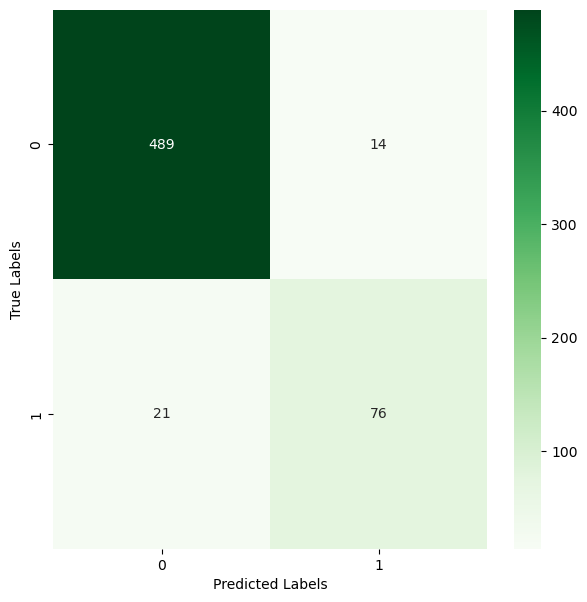

In [15]:
#import the matplotlib to plot the data graphically
import matplotlib.pyplot as plt

#import seaborn for desired graphical representation
import seaborn as sb

# Plot the confusion matrix
plt.figure(figsize=(7,7))
sb.heatmap(c_m, annot=True, cmap="Greens", fmt="d", cbar=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# APPROACH
## CountVectorizer:
--> CountVectorizer is a valuable feature extraction technique. It is used for converting the text data into a word count. 

--> It works by tokenizing text into individual words and counting the number of times those words appear. 

--> It is valuable for text data preprocessing by converting raw text into a feature matrix to train machine learning models.

--> CountVectorizer can handle large datasets containing texts.

## Preprocessing: 

-->The dataset included a column called "email" that included the text of a random email. 
   It contains many undesired characters, special characters that are optional to train the model or test the dataset.

-->Imported 're' to delete all unneeded characters, special characters, and lowercase and white spaces.


# External Sources
   --> https://towardsdatascience.com/understanding-the-confusion-matrix-and-how-to-implement-it-in-python-319202e0fe4d#baf7   
  
  --> https://heartbeat.comet.ml/naive-bayes-classifier-in-python-using-scikit-learn-13c4deb83bcf
   
   --> https://towardsdatascience.com/feature-extraction-techniques-d619b56e31be#:~:text=Feature%20Extraction%20aims%20to%20reduce,the%20original%20set%20of%20features.

## Contribution 
--> Rohith Reddy Basireddy focused more on nearest neighbors, Arun worked primarily with decision trees,
    and Rushi Vardan worked with naive bayes. 
    
--> We discussed the entire project assignment and explored ways to finish each other's portions.

--> We all organized the meeting, spoke over all of the datasets, commented on the code collectively, 
    and then wrote the report.